In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from datetime import datetime
sns.set()

### Importing the Data

In [2]:
raw_csv_data = pd.read_csv('data/BTCUSDT.csv', index_col=0)
btc_data = raw_csv_data.copy()

In [3]:
date = [datetime.utcfromtimestamp(btc_data["Open time"][X]//1000).strftime('%Y-%m-%d %H:%M:%S') for X in range(len(btc_data))]
btc_data["Date"]=date

In [33]:
del btc_data['Open time']
del btc_data['Open']
del btc_data['High']
del btc_data['Low']
btc_data.head()

,Close,Volume
Date,,
2017-12-31 00:00:00,12347.99,6.884066
2017-12-31 00:01:00,12300.14,3.302100
2017-12-31 00:02:00,12311.15,8.647718
2017-12-31 00:03:00,12329.76,5.375271
2017-12-31 00:04:00,12311.02,12.270461


### Lenght of the Time Period

In [4]:
btc_data['Date'].describe()

count                 2243612
unique                2243612
top       2017-12-31 00:00:00
freq                        1
Name: Date, dtype: object

### Set index

In [5]:
#btc_data = btc_data[['Open time',"Date", 'Open', 'High', 'Low', 'Close',"Volume"]]
btc_data.set_index("Date", inplace=True)

### Examining the Data

In [6]:
btc_data.head()

,Open time,Open,High,Low,Close,Volume
Date,,,,,,
2017-12-31 00:00:00,1514678400000,12345.10,12397.16,12337.60,12347.99,6.884066
2017-12-31 00:01:00,1514678460000,12337.60,12348.00,12300.07,12300.14,3.302100
2017-12-31 00:02:00,1514678520000,12302.32,12337.19,12299.98,12311.15,8.647718
2017-12-31 00:03:00,1514678580000,12311.12,12345.84,12311.00,12329.76,5.375271
2017-12-31 00:04:00,1514678640000,12319.28,12341.45,12287.89,12311.02,12.270461


In [7]:
btc_data

,Open time,Open,High,Low,Close,Volume
Date,,,,,,
2017-12-31 00:00:00,1514678400000,12345.10,12397.16,12337.60,12347.99,6.884066
2017-12-31 00:01:00,1514678460000,12337.60,12348.00,12300.07,12300.14,3.302100
2017-12-31 00:02:00,1514678520000,12302.32,12337.19,12299.98,12311.15,8.647718
2017-12-31 00:03:00,1514678580000,12311.12,12345.84,12311.00,12329.76,5.375271
2017-12-31 00:04:00,1514678640000,12319.28,12341.45,12287.89,12311.02,12.270461
...,...,...,...,...,...,...
2022-04-12 14:32:00,1649773920000,39893.26,39916.42,39878.76,39910.00,41.412350
2022-04-12 14:33:00,1649773980000,39909.99,39933.52,39905.32,39908.10,34.018590
2022-04-12 14:34:00,1649774040000,39908.10,39970.00,39908.10,39957.97,33.642590


In [8]:
btc_data.describe()

,Open time,Open,High,Low,Close,Volume
count,2.243612e+06,2.243612e+06,2.243612e+06,2.243612e+06,2.243612e+06,2.243612e+06
mean,1.582320e+12,1.985607e+04,1.986978e+04,1.984220e+04,1.985608e+04,3.762908e+01
std,3.897670e+10,1.810726e+04,1.811966e+04,1.809493e+04,1.810727e+04,5.878177e+01
min,1.514678e+12,3.157690e+03,3.162920e+03,3.156260e+03,3.157670e+03,0.000000e+00
25%,1.548571e+12,7.234410e+03,7.237770e+03,7.230870e+03,7.234440e+03,1.192698e+01
50%,1.582356e+12,9.750890e+03,9.756005e+03,9.745675e+03,9.750860e+03,2.213465e+01
75%,1.616071e+12,3.630877e+04,3.634679e+04,3.627219e+04,3.630856e+04,4.161594e+01
max,1.649774e+12,6.900000e+04,6.900000e+04,6.878670e+04,6.900000e+04,3.564139e+03


In [9]:
btc_data.isna()

,Open time,Open,High,Low,Close,Volume
Date,,,,,,
2017-12-31 00:00:00,False,False,False,False,False,False
2017-12-31 00:01:00,False,False,False,False,False,False
2017-12-31 00:02:00,False,False,False,False,False,False
2017-12-31 00:03:00,False,False,False,False,False,False
2017-12-31 00:04:00,False,False,False,False,False,False
...,...,...,...,...,...,...
2022-04-12 14:32:00,False,False,False,False,False,False
2022-04-12 14:33:00,False,False,False,False,False,False
2022-04-12 14:34:00,False,False,False,False,False,False


In [10]:
btc_data.Close.isna().sum()

0

### Plotting the Data

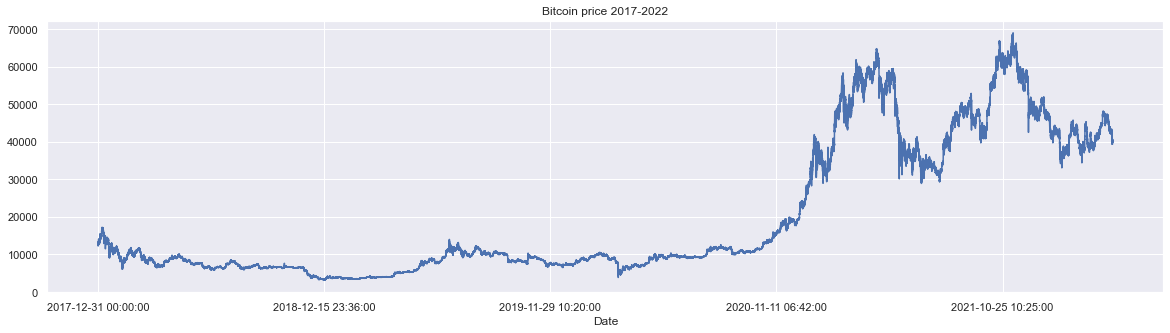

In [11]:
btc_data.Close.plot(figsize=(20,5), title= 'Bitcoin price 2017-2022');

### The QQ Plot
Quantile-quantile: to determine whether data is distributed in a Normal distribution.

In [12]:
import scipy.stats
import pylab

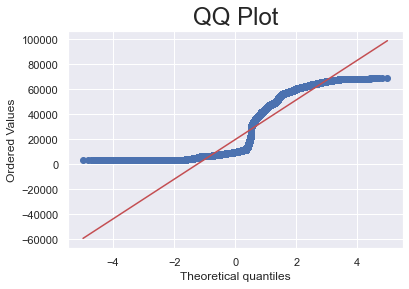

In [13]:
scipy.stats.probplot(btc_data.Close, plot = pylab)
plt.title("QQ Plot", size = 24)
pylab.show()

There are far more zeros compare to theoretical normal distributioin. Therefore, the data does not follow a normal distribution.

### Setting the Desired Frequency

In [30]:
#btc_data_minute=btc_data.asfreq('m')

In [34]:
btc_data

,Close,Volume
Date,,
2017-12-31 00:00:00,12347.99,6.884066
2017-12-31 00:01:00,12300.14,3.302100
2017-12-31 00:02:00,12311.15,8.647718
2017-12-31 00:03:00,12329.76,5.375271
2017-12-31 00:04:00,12311.02,12.270461
...,...,...
2022-04-12 14:32:00,39910.00,41.412350
2022-04-12 14:33:00,39908.10,34.018590
2022-04-12 14:34:00,39957.97,33.642590


### Splitting the Data

In [35]:
size = int(len(btc_data)*0.8)
df_train = btc_data.iloc[:size]
df_test = btc_data.iloc[size:]
df_train.tail()

,Close,Volume
Date,,
2021-06-04 17:19:00,37014.69,35.381603
2021-06-04 17:20:00,37019.05,17.597166
2021-06-04 17:21:00,37008.31,18.367609
2021-06-04 17:22:00,36976.44,33.606490
2021-06-04 17:23:00,37039.99,37.318903


In [36]:
df_test.head()

,Close,Volume
Date,,
2021-06-04 17:24:00,37169.35,169.685670
2021-06-04 17:25:00,37177.10,86.940233
2021-06-04 17:26:00,37182.48,129.350496
2021-06-04 17:27:00,37211.20,41.808435
2021-06-04 17:28:00,37188.50,53.704958
